# Fig 2 - skill score map

In [1]:
# Use jenv as having problems with gdal in scoresenv
import geopandas as gpd
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import cartopy.feature as cf
import yaml
import xarray as xr
import matplotlib as mpl

In [2]:
df = gpd.read_file("../data/districts/public_weather_districts.shp")
reader = shpreader.Reader("../data/districts/public_weather_districts.shp")
ds = xr.open_dataset("../results/skill_score.nc")

with open("../data/districts/public_weather_districts.yml", "r") as file:
    districts_yml = yaml.safe_load(file)

In [3]:
# Create a dictionary for mapping between the two ways to name districts
mappingdict = {}
for i in districts_yml:
    newname = districts_yml[i]["state_code"] + "/" + districts_yml[i]["dist_name"]
    mappingdict[newname] = i

In [4]:
# Create pandas df with colour info and hatching


def add_colours(row):
    if row["skill_score"] < 0:
        return "#ce1256"
    elif row["skill_score"] == 0:
        return "#FFFFFF"
    elif row["skill_score"] <= 0.2:
        return "#f7fcf5"
    elif row["skill_score"] <= 0.4:
        return "#e5f5e0"
    elif row["skill_score"] <= 0.6:
        return "#c7e9c0"
    elif row["skill_score"] <= 0.8:
        return "#74c476"
    elif row["skill_score"] <= 1:
        return "#238b45"

In [5]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
plt.gcf().set_size_inches(8, 12)


def assign_hatching(row):
    if row["statistically_different"]:
        return ".."
    else:
        return None


def create_sub_fig(axx, lead_day):
    axx.set_extent([112, 155, -42, -10])
    axx.add_feature(cf.OCEAN)
    axx.add_feature(cf.LAND, color="grey")

    df2 = ds.sel(lead_day=lead_day).to_dataframe()
    df2["color"] = df2.apply(add_colours, axis=1)
    df2["hatching"] = df2.apply(assign_hatching, axis=1)

    for district in reader.records():
        if district.attributes["name"] == "National/All":
            continue
        new_district_name = mappingdict[district.attributes["name"]]

        shape_feature = ShapelyFeature(
            [district.geometry],
            ccrs.PlateCarree(),
            facecolor=df2.loc[new_district_name]["color"],
            edgecolor="black",
            hatch=df2.loc[new_district_name]["hatching"],
        )
        axx.add_feature(shape_feature)
    axx.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="gray",
        alpha=0.5,
        linestyle="--",
        zorder=0,
    )


create_sub_fig(ax, 0)
create_sub_fig(ax2, 2)
ax.set_title("a)", loc="left", fontweight="bold")
ax2.set_title("b)", loc="left", fontweight="bold")
fig.tight_layout()
plt.savefig(f"../figures/fig_2_skill_score_lead_day.pdf")

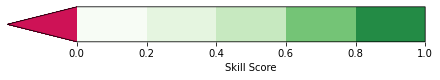

In [ ]:
fig, ax = plt.subplots(figsize=(6, 1), layout="constrained")


cmap = mpl.colors.ListedColormap(
    ["#f7fcf5", "#e5f5e0", "#c7e9c0", "#74c476", "#238b45"]
).with_extremes(under="#ce1256")
bounds = [0, 0.2, 0.4, 0.6, 0.8, 1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    orientation="horizontal",
    extend="min",
    extendfrac="auto",
    spacing="proportional",
    label="Skill Score",
)
plt.savefig(f"../figures/fig_2skill_score_colourbar.pdf")

## Generate figure for any lead day

Text(0.0, 1.0, 'a)')

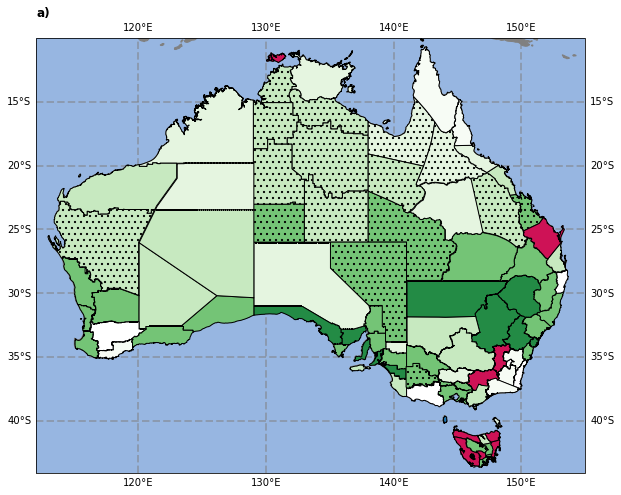

In [ ]:
LEAD_DAY = 1


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([112, 155, -42, -10])
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND, color="grey")
plt.gcf().set_size_inches(16, 8)


df2 = ds.sel(lead_day=LEAD_DAY).to_dataframe()
df2["color"] = df2.apply(add_colours, axis=1)


def assign_hatching(row):
    if row["statistically_different"]:
        return ".."
    else:
        return None


df2["hatching"] = df2.apply(assign_hatching, axis=1)

for district in reader.records():
    if district.attributes["name"] == "National/All":
        continue
    new_district_name = mappingdict[district.attributes["name"]]

    shape_feature = ShapelyFeature(
        [district.geometry],
        ccrs.PlateCarree(),
        facecolor=df2.loc[new_district_name]["color"],
        edgecolor="black",
        hatch=df2.loc[new_district_name]["hatching"],
    )
    ax.add_feature(shape_feature)
ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
    zorder=0,
)
ax.set_title("a)", loc="left", fontweight="bold")